# Microsoft Movie Market Analysis

### J.D.Denney

### Part 1, Introduction

#### Microsoft, the client, has tasked our firm with the analysis of film industry data in order to determine trends and provide insights into their movie making ventures. All analysis and subsequent recommendations will be key to their initial efforts at penetrating the market.

#### Let's first pull in the data and took a look at it. 

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import sqlite3

# current issues - 1. there are duplicate titles, as many as 4 duplicates for 'The Door' in df_clean  

In [2]:
#initial pull of data with pandas read of title basics csv to get a feel for the data
dfbscs = pd.read_csv(r"C:\Users\josep\Desktop\CourseWork\phase_1\Phase1\MovieProject\zippedData\imdb.title.basics.csv.gz")
pd.options.display.float_format = '{:.3f}'.format # to remove the scientific notation for very large numbers and format everything to 3 decimal places

### We've imported our first data and formated any float objects in our dataframes moving forward. What does a quick look at the first five rows tell us? 

### imdb.title.basics.csv gives us access to the titles of the movie, what genre it is, as well as runtime and start year. 

In [3]:
dfbscs.head()

tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013          175.000    Action,Crime,Drama  
1        2019          114.000       Biography,Drama  
2        2018          122.000                 Drama  
3        2018              nan          Comedy,Drama  
4        2017           80.000  Comedy,Drama,Fantasy

In [4]:
# Let's pull in the other two recommended databases to take a look at what is going on. 
dfrtngs = pd.read_csv(r"C:\Users\josep\Desktop\CourseWork\phase_1\Phase1\MovieProject\zippedData\imdb.title.ratings.csv.gz")
dfgrss = pd.read_csv(r"C:\Users\josep\Desktop\CourseWork\phase_1\Phase1\MovieProject\zippedData\bom.movie_gross.csv.gz")               

In [5]:
# And get some info on each of them while taking a look at their size and datatypes. 
# tconst column will be a key between basics and ratings, while title will be a bit trickier
# of a key between basics and movie gross dataframes
dfbscs.info()
dfrtngs.info()
dfgrss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries

### Some of these dataFrames have a lot of rows of data, some have much less. There's a lot going on here, but let's first make sure that we clean up all of the data that will be used to provide insights and make recommendations to Microsoft.

In [6]:
dfbscs.head()

tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013          175.000    Action,Crime,Drama  
1        2019          114.000       Biography,Drama  
2        2018          122.000                 Drama  
3        2018              nan          Comedy,Drama  
4        2017           80.000  Comedy,Drama,Fantasy

In [7]:
dfrtngs.head()

tconst  averagerating  numvotes
0  tt10356526          8.300        31
1  tt10384606          8.900       559
2   tt1042974          6.400        20
3   tt1043726          4.200     50352
4   tt1060240          6.500        21

In [8]:
dfgrss.head()

title studio  domestic_gross  \
0                                  Toy Story 3     BV   415000000.000   
1                   Alice in Wonderland (2010)     BV   334200000.000   
2  Harry Potter and the Deathly Hallows Part 1     WB   296000000.000   
3                                    Inception     WB   292600000.000   
4                          Shrek Forever After   P/DW   238700000.000   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010

In [9]:
df_ratings = pd.merge(dfbscs,dfrtngs, on='tconst') # titles without ratings doesnt tell us much - full merge these two dataframes and then inspect df_ratings
df_ratings
# quick check to see if numbers fall in reasonable parameters
print(df_ratings['averagerating'].max()) # = 10
print(df_ratings['averagerating'].min()) # = 1.0
print(df_ratings['start_year'].max()) # = 2019
print(df_ratings['start_year'].min()) # = 2010
# merging data allows for a single consolidated list and removes any titles that do not have an
# average rating or numvotes
# can then merge the new df with dfgrss to get gross amounts
# but have to change the column headings on dfbscs first to title from primary title


10.0
1.0
2019
2010


In [10]:
# create a new df, df_clean that can merge on column 'title' after renaming the column from 'primary_title' with the gross box office figures in dfgrss 
df_clean = df_ratings.rename(columns = {'primary_title':'title'})
df_clean = df_clean.sort_values(by=['numvotes'],axis=0,ascending=False,ignore_index=False)
df_clean = df_clean.drop_duplicates(subset='title') # after deleting duplicates for df_ratings_and_gross, decided to come and further clean up df_clean
print(len(df_clean))
# check for duplicate titles, verify that "The Door" has multiple entries

# *****want to remove duplicate titles with the least numvotes this is temp debugging code, comment off later
# 
# duplicates = df_clean[df_clean.duplicated(subset='title')]
# print(len(duplicates))
# print(duplicates.head())
# for x in df_clean['title']:
#     if x=='The Door':
#         print(x)
# *****     

df_ratings_and_gross = pd.merge(df_clean,dfgrss, on='title')
# we now have two sets of data - one 3027 (df_ratings_and_gross) rows long that contains ratings, genres,
# and domestic and foreign gross. The other data set has 73856 records, (df_clean) in it which 
# can still provide data on overall ratings. 
# There is still some data cleaning to do before we begin visualizing the data. 
# additionally, one set contains foreign gross which is set to a sting datatype, it will need
# to be converted to a float object

# since there are duplicates in the data, I want to sort the df and have the title with the most numvotes first and drop the rest of the duplicates in order to accomplish this

df_ratings_and_gross = df_ratings_and_gross.sort_values(by=['numvotes'],axis=0,ascending=False,ignore_index=False)
# now we can utilize .drop_duplicates on the titles column in order to remove all duplicate titles while keeping the title with the most num votes. 
print(df_ratings_and_gross)
df_ratings_and_gross = df_ratings_and_gross.drop_duplicates(subset='title')
print(df_ratings_and_gross) # note that rows have decreased to 2598 from 3027 after deleting duplicate titles. 

69993
         tconst                    title           original_title  start_year  \
0     tt1375666                Inception                Inception        2010   
1     tt1345836    The Dark Knight Rises    The Dark Knight Rises        2012   
2     tt0816692             Interstellar             Interstellar        2014   
3     tt1853728         Django Unchained         Django Unchained        2012   
4     tt0993846  The Wolf of Wall Street  The Wolf of Wall Street        2013   
...         ...                      ...                      ...         ...   
2594  tt8851190                      Red                      Red        2018   
2595  tt1666555              Anchor Baby              Anchor Baby        2010   
2596  tt1692325           Eyes Wide Open           Eyes Wide Open        2010   
2597  tt3436064         The Last Station       La última estación        2012   
2598  tt2713406                 Meerkats                 Meerkats        2011   

      runtime_minutes

In [11]:
# change foreign gross to a float obj
df_ratings_and_gross['foreign_gross'] = pd.to_numeric(df_ratings_and_gross['foreign_gross'],errors='coerce')
# in this ~3000 records dataset, we need to look for outliers or invalid data. look 
# for max, mins in float data. nothing stands out
print(df_ratings_and_gross['averagerating'].max()) # = 9.2
print(df_ratings_and_gross['averagerating'].min()) # = 1.6
print(df_ratings_and_gross['year'].max()) # = 2018
print(df_ratings_and_gross['year'].min()) # = 2010
print(df_ratings_and_gross['start_year'].max()) # = 2019
print(df_ratings_and_gross['start_year'].min()) # = 2010

8.8
1.6
2018
2010
2019
2010


#### I want to also make sure that all NaN values are ignored when proceeding with the data. Keeping in mind that there are NaN values still present in the data, let's move forward 
#### and answer some questions about the data and what it means. 

### Part 2, Question 1

#### Does a longer runtime indicate a lower average rating? Should Microsoft have a target movie length range for their projects? 

In [12]:
# For this initial question, we need to ignore NaN values in average rating. In addition to excluding
# NaN values, there are some movies with high or low ratings but very few votes - this could mean
# that the average ratings are higher or lower than they would otherwise be with more reviewers. 
# For that reason, I will exclude data with 10 votes or fewer when comparing the data. (data minimum number of votes is 5)

In [13]:
# create new df to call for lmplot
data_df = df_clean[['runtime_minutes','averagerating','numvotes']]
# filter for numvotes less than 10
df_over_ten = data_df[data_df.numvotes > 10]
# filter for movie outliers with ridiculous lengths
df_over_ten = df_over_ten[df_over_ten.runtime_minutes <= 400]
df_over_ten = df_over_ten.dropna()
# we have removed all rows with a NaN present. Additionally, we can see that we have 
# excluded data that has less than 6 votes that are contributing to the rating. 
print(df_over_ten)
# count values to take another look at the data
df_over_ten['runtime_minutes'].value_counts().sort_values()
print(df_over_ten.corr())
# also standard deviation for runtime minutes to figure out a good range for their movie length!
df_over_ten.mean()
df_over_ten.std()
# 68% of movies are produced within 22 minutes of a 95 minute average.

runtime_minutes  averagerating  numvotes
2387           148.000          8.800   1841066
2241           164.000          8.400   1387769
280            169.000          8.600   1299334
12072          165.000          8.400   1211405
325            143.000          8.100   1183655
...                ...            ...       ...
30670           85.000          6.500        11
30560           45.000          5.900        11
11947          102.000          6.300        11
11502           89.000          7.600        11
34460          240.000          8.500        11

[52456 rows x 3 columns]
                 runtime_minutes  averagerating  numvotes
runtime_minutes            1.000          0.018     0.125
averagerating              0.018          1.000     0.066
numvotes                   0.125          0.066     1.000


runtime_minutes      22.422
averagerating         1.431
numvotes          35847.867
dtype: float64

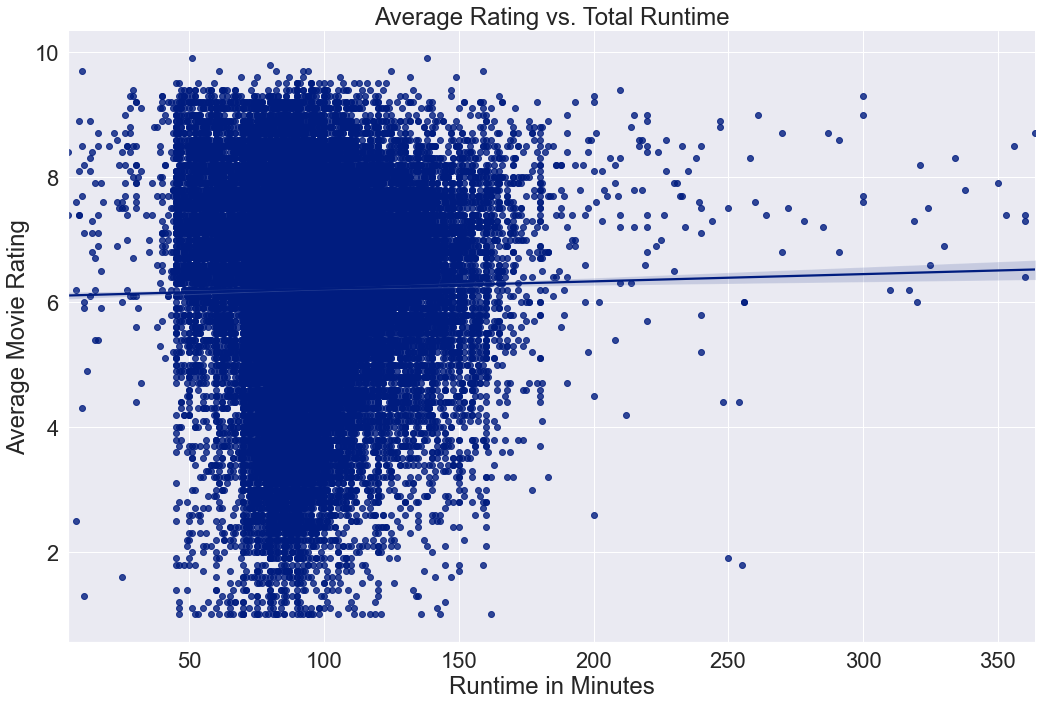

In [14]:
# drop numvotes column from df_over_five and create an lmplot in seaborn
df_plot1 = df_over_ten.drop(columns=['numvotes'])
# plot lmplot
sns.set(font_scale=2)
sns.set_style("darkgrid")
palette = sns.set_palette("dark")
ax = sns.lmplot(x='runtime_minutes',y='averagerating',data=df_plot1,height=10,aspect=15/10)
ax.set(xlabel="Runtime in Minutes",ylabel="Average Movie Rating")
plt.title('Average Rating vs. Total Runtime')
plt.show()

### Question 1 Insights
#### There is no readily apparent correlation between total runtime and the average rating of a movie based on the information in the data tables. Microsoft should focus on making movies within 1 standard deviation (+/- 22 minutes) of the mean of 95 minutes.  

In [15]:
df_plot1.corr()
# as we can see, there is no correlation between runtime_minutes and averagerating

runtime_minutes  averagerating
runtime_minutes            1.000          0.018
averagerating              0.018          1.000

### Part 3, Question 2

#### What can we learn by looking at the correlation between total gross and the average
#### rating of a movie? Put slightly differently, does a higher quality movie demand more 
#### money at the BO?

In [16]:
# just as a reminder, here is what the table we will be working with for question 2 looks like
df_ratings_and_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2598 entries, 0 to 2598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           2598 non-null   object 
 1   title            2598 non-null   object 
 2   original_title   2598 non-null   object 
 3   start_year       2598 non-null   int64  
 4   runtime_minutes  2598 non-null   float64
 5   genres           2598 non-null   object 
 6   averagerating    2598 non-null   float64
 7   numvotes         2598 non-null   int64  
 8   studio           2595 non-null   object 
 9   domestic_gross   2581 non-null   float64
 10  foreign_gross    1554 non-null   float64
 11  year             2598 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 263.9+ KB


In [17]:
# For this question, we will look at a graphical representation of the average rating
# plotted agains the total gross (domestic_gross + foreign_gross)
# sum foreign and domestic into new column, ignoring NaN values of which there could result in # a max of 17 (2598 total rows less 2581 values in doomestic gross)
df_ratings_and_gross['total_gross'] = df_ratings_and_gross['domestic_gross'].fillna(0)+df_ratings_and_gross['foreign_gross'].fillna(0)
df_ratings_and_gross # but how many of the total gross are 0 after adding a NaN from both 
# domestic/foreign columns
df_ratings_and_gross.isna().sum()
df_ratings_and_gross['total_gross'].value_counts()
df_ratings_and_gross['total_gross']=df_ratings_and_gross['total_gross']/1000000000
# great, we can see that total gross has 0 elements that show NaN, as predicted, which is what we need.
# If a movie had NaN in both domestic and foreign gross then it is showing a value of 0 in total gross.
# after checking for value counts == 0 we can see that we have only good data in the total gross column,
# assuming that all NaN's were meant to be 0's. For domestic gross, that is hard to assume, as it would 
# be unusual but not impossible for a movie to make money abroad but not in its home country. 

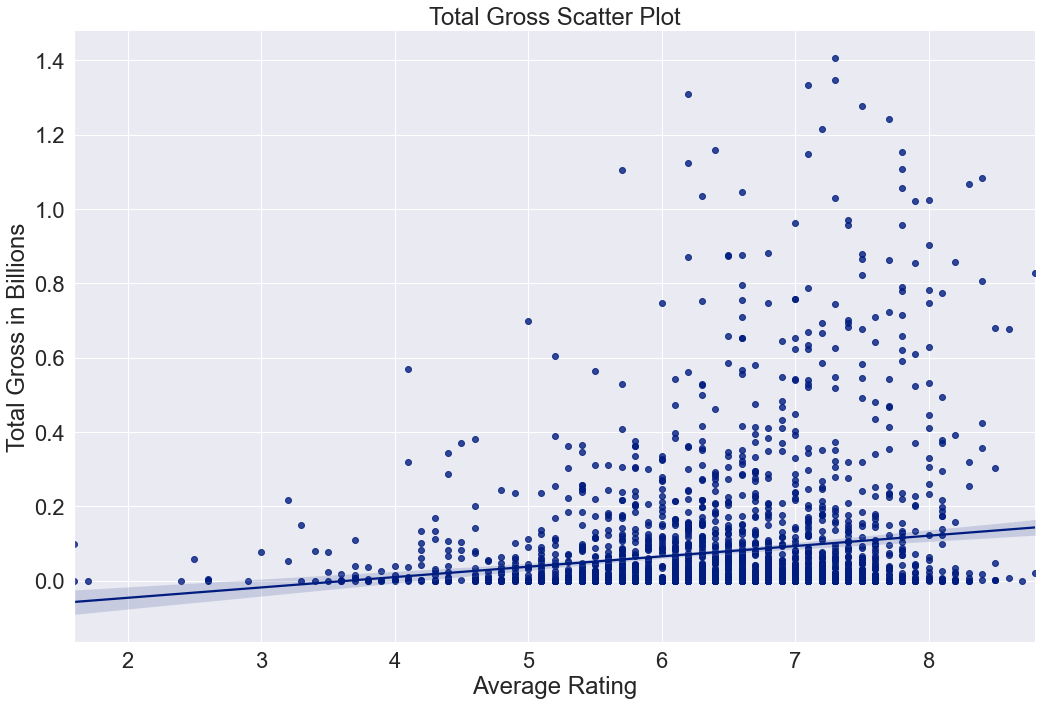

In [18]:
# plot graph of average rating vs total gross
sns.set(font_scale=2)
sns.set_style("darkgrid")
palette = sns.set_palette("dark")
ax = sns.lmplot(x='averagerating',y=('total_gross'),data=df_ratings_and_gross,height=10,aspect=15/10)
ax.set(xlabel="Average Rating",ylabel="Total Gross in Billions")
plt.ticklabel_format(style='plain',axis='y')
plt.title('Total Gross Scatter Plot')
plt.show()
# issue here is y axis label with 1e9 top left, make it prettier
df_plot2 = df_ratings_and_gross.drop(columns=['start_year','runtime_minutes','numvotes','year'])

### Question 2 Insights
#### As seen in the graph above and the correlation table below, there is only a slight correlation between average rating and the total gross of a movie. The higher quality a movie is, the more likely it is to gross more at the box office. We still haven't hit on a truly valuable insight for the client.

In [19]:
df_plot2.corr()

averagerating  domestic_gross  foreign_gross  total_gross
averagerating           1.000           0.154          0.186        0.147
domestic_gross          0.154           1.000          0.826        0.920
foreign_gross           0.186           0.826          1.000        0.978
total_gross             0.147           0.920          0.978        1.000

### Part 4, Question 3

What genre of films gross the most at the box office (BO)? What other insights can we gather from looking into this?

In [20]:
# We will need to break out the genres and list them separately for all films where there 
# are multiple genres listed.
# df_ratings_and_gross has total gross in it from our previous exercise
len(df_ratings_and_gross['genres'].unique())
# let's separate these out

296

In [21]:
df_ratings_and_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2598 entries, 0 to 2598
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           2598 non-null   object 
 1   title            2598 non-null   object 
 2   original_title   2598 non-null   object 
 3   start_year       2598 non-null   int64  
 4   runtime_minutes  2598 non-null   float64
 5   genres           2598 non-null   object 
 6   averagerating    2598 non-null   float64
 7   numvotes         2598 non-null   int64  
 8   studio           2595 non-null   object 
 9   domestic_gross   2581 non-null   float64
 10  foreign_gross    1554 non-null   float64
 11  year             2598 non-null   int64  
 12  total_gross      2598 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 284.2+ KB


In [22]:
# need to separate genres out into a list and count total occurences 
# see above for list of unique genre combinations - there are too many to put together an insightful
# histogram with. 
#genres_list = df_ratings_and_gross['genres'].dropna().str.lower().str.split(',').to_list()
#g_list = []

#for genre_list in genres_list:
#    try:
#        g_list.extend(genre_list)
#    except:
#        continue

In [23]:
# Raf dummify genres example
# df_example = pd.get_dummies(df_ratings_and_gross['genres'].str.split(',').apply(pd.Series).stack()).sum(level=0)

### Lets group our data by genres, including those where genres are combined and look at what the averages of the data can show us. 

In [24]:
df_genres = df_ratings_and_gross.groupby(df_ratings_and_gross['genres']).mean().reset_index()
# let's graph the top 20 of 
# this for total_gross and single out some genres (and genre combinations) that are generally more 
# successful. 
df_genres2 = df_genres.sort_values('total_gross',axis=0,ascending=False).reset_index()
df_genres2.head(15) # we can see hear the top 15 grossing genres or combination of genres

index                      genres  start_year  runtime_minutes  \
0     106           Adventure,Fantasy    2013.333          139.667   
1     101      Adventure,Drama,Sci-Fi    2014.500          156.500   
2      11     Action,Adventure,Sci-Fi    2013.978          131.370   
3      30       Action,Comedy,Mystery    2018.000          121.000   
4     148     Biography,Drama,Musical    2017.000          105.000   
5       8    Action,Adventure,Fantasy    2015.065          117.903   
6     110    Adventure,Mystery,Sci-Fi    2012.000          124.000   
7      12   Action,Adventure,Thriller    2013.750          125.000   
8     104    Adventure,Family,Fantasy    2015.125          120.000   
9      72               Action,Sci-Fi    2014.000          113.000   
10     75  Adventure,Animation,Comedy    2014.200           94.453   
11     96     Adventure,Drama,Fantasy    2013.400          118.800   
12     68       Action,Mystery,Sci-Fi    2014.000          113.000   
13     45         Action,Drama,Family    2010.500          133.500   
14      4     Action,Adventure,Comedy    2015.355          112.806   

    averagerating   numvotes  domestic_gross  foreign_gross     year  \
0           7.167 375770.333   192899999.667  511133333.333 2013.333   
1           8.300 989725.000   208200000.000  445550000.000 2014.500   
2           6.833 428425.130   238628260.848  385655813.953 2014.000   
3           6.100   1250.000     2000000.000  542100000.000 2018.000   
4           7.600 199663.000   174300000.000  260700000.000 2017.000   
5           6.287 250437.677   141251193.548  288261290.323 2015.161   
6           7.000 538720.000   126500000.000  276900000.000 2012.000   
7           6.550 224555.000   109156125.000  302126666.667 2013.750   
8           6.113 164708.625   115437500.000  269550000.000 2015.125   
9           7.900 546284.000   100200000.000  270300000.000 2014.000   
10          6.439 107169.080   128601767.973  249474999.986 2014.347   
11          6.840 254748.000   117880000.000  246180000.000 2013.400   
12          6.800 387038.000   102400000.000  245900000.000 2014.000   
13          6.650 214967.500   131050000.000  198150000.000 2010.500   
14          6.342 187106.806   102332106.419  259768000.000 2015.516   

    total_gross  
0         0.704  
1         0.654  
2         0.599  
3         0.544  
4         0.435  
5         0.430  
6         0.403  
7         0.392  
8         0.385  
9         0.370  
10        0.368  
11        0.364  
12        0.348  
13        0.329  
14        0.312

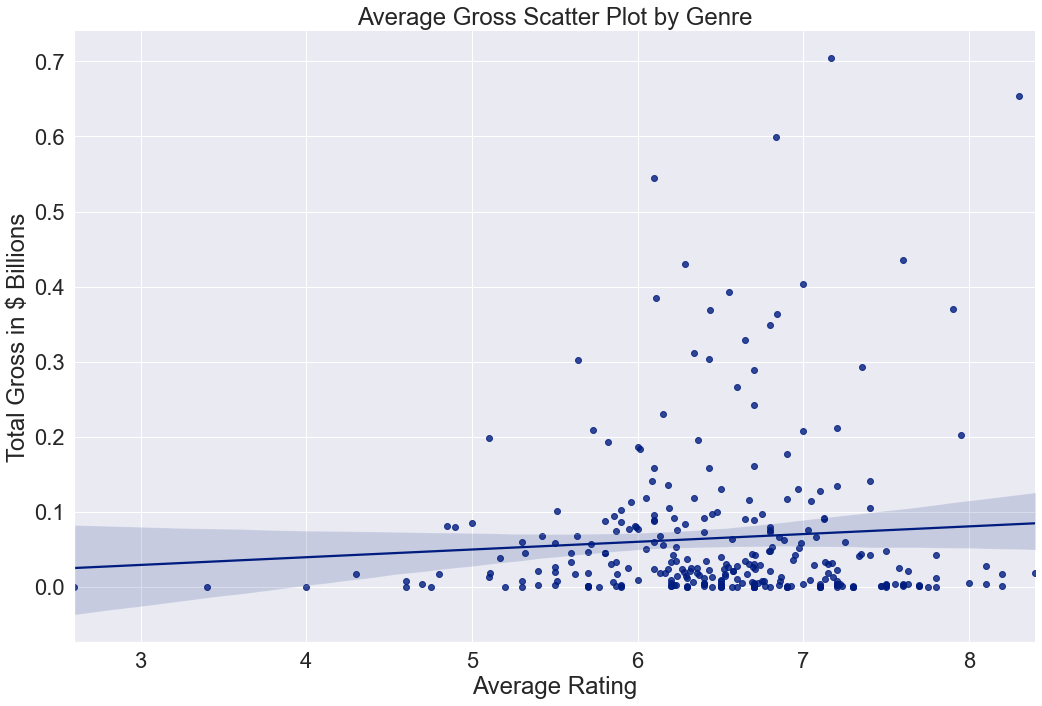

index  start_year  runtime_minutes  averagerating  numvotes  \
index            1.000       0.011           -0.165          0.069    -0.155   
start_year       0.011       1.000            0.098          0.169    -0.021   
runtime_minutes -0.165       0.098            1.000          0.052     0.282   
averagerating    0.069       0.169            0.052          1.000     0.189   
numvotes        -0.155      -0.021            0.282          0.189     1.000   
domestic_gross  -0.236       0.048            0.220          0.050     0.788   
foreign_gross   -0.311       0.253            0.324          0.108     0.646   
year             0.018       0.954            0.076          0.215    -0.088   
total_gross     -0.298       0.107            0.266          0.075     0.761   

                 domestic_gross  foreign_gross   year  total_gross  
index                    -0.236         -0.311  0.018       -0.298  
start_year                0.048          0.253  0.954        0.107  
runtime_minutes           0.220          0.324  0.076        0.266  
averagerating             0.050          0.108  0.215        0.075  
numvotes                  0.788          0.646 -0.088        0.761  
domestic_gross            1.000          0.763 -0.026        0.906  
foreign_gross             0.763          1.000  0.201        0.937  
year                     -0.026          0.201  1.000        0.042  
total_gross               0.906          0.937  0.042        1.000

In [25]:
# graph represents the average per genre rating and the average per genre total gross - hone this graph to highlight highest average grosses among the data
sns.set(font_scale=2)
sns.set_style("darkgrid")
palette = sns.set_palette("dark")
ax = sns.lmplot(x='averagerating',y='total_gross',data=df_genres2,height=10,aspect=15/10)
ax.set(xlabel="Average Rating",ylabel="Total Gross in $ Billions")
plt.ticklabel_format(style='plain',axis='y')
plt.title('Average Gross Scatter Plot by Genre')
plt.show()
df_genres2.corr()


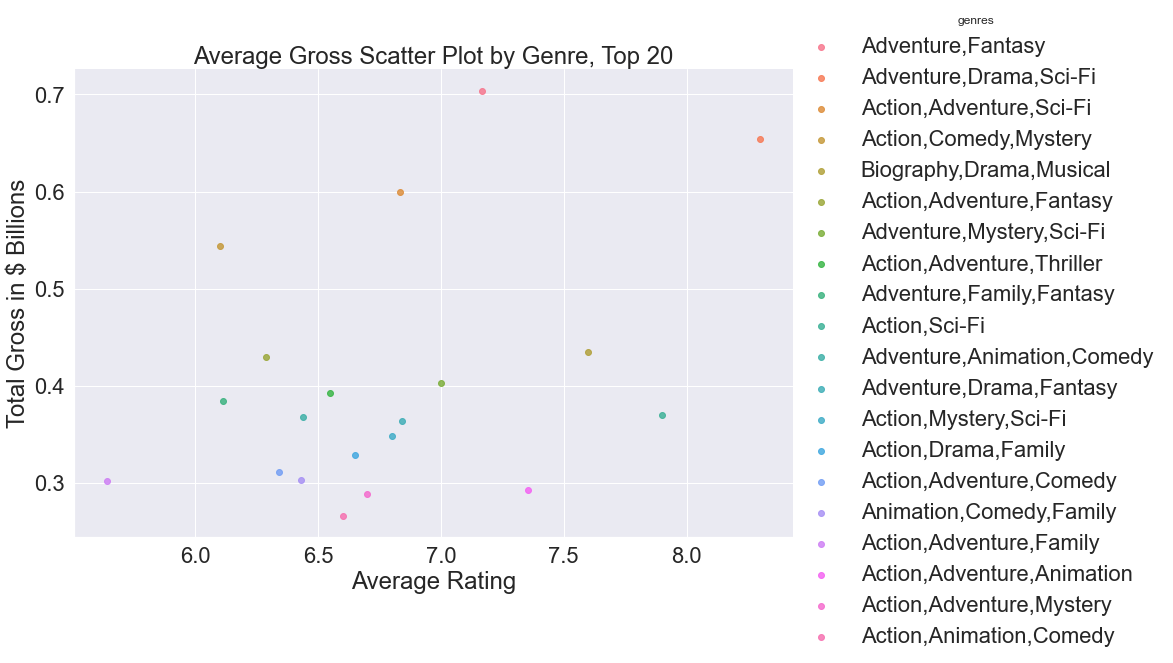

In [26]:
# one scatter plot for the highest 15 grossing genres and have average rating on x axis 
sns.set(font_scale=2)
sns.set_style("darkgrid")
palette = sns.set_palette("dark")
ax = sns.lmplot(x='averagerating',y='total_gross',data=df_genres2.head(20),hue='genres',height=8,aspect=15/10)
ax.set(xlabel="Average Rating",ylabel="Total Gross in $ Billions")
plt.ticklabel_format(style='plain',axis='y')
plt.title('Average Gross Scatter Plot by Genre, Top 20')
plt.show()


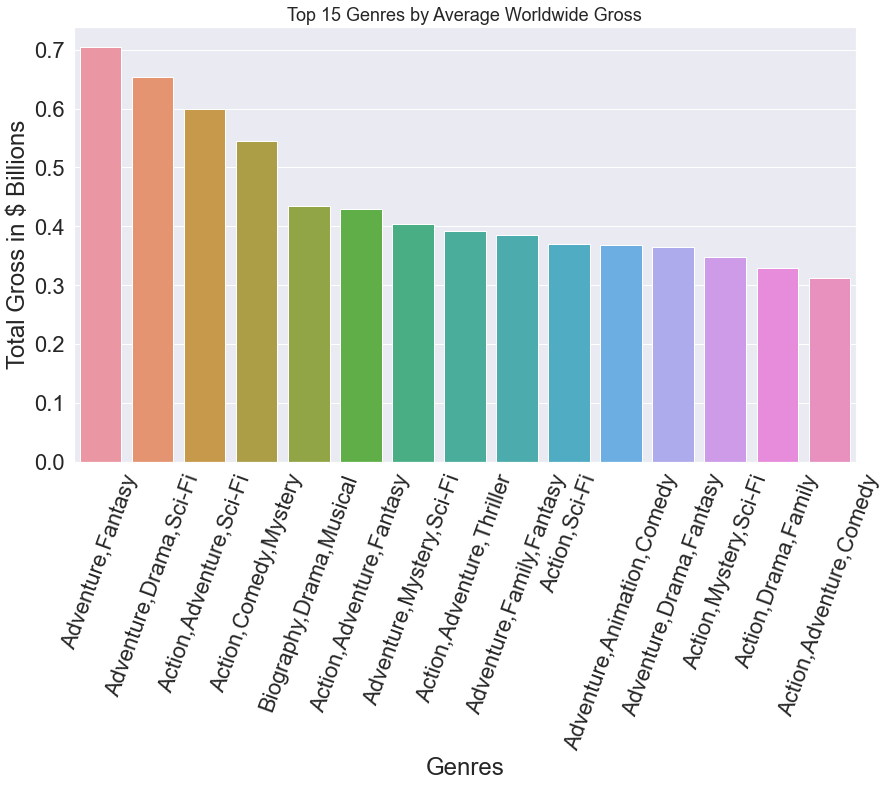

In [27]:
# one bar chart with genres on x axis, total gross on y axis
fig_dims = (14,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale=1.5)
sns.set_style("darkgrid")
palette = sns.set_palette("dark")
ax = sns.barplot(x=df_genres2.head(15)['genres'], y=df_genres2.head(15)['total_gross'])
ax.set(xlabel="Genres",ylabel="Total Gross in $ Billions")
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=70)
plt.title('Top 15 Genres by Average Worldwide Gross')
plt.show()

### Question 3 Insights
#### Adventure, Action, Fantasy, and Sci-Fi movies are all heavily featured as the highest grossing films. Microsoft should begin by focusing on some of these more popular genres in an effort to enter the market, even if there is low ROI up front. Creating good cornerstone content now will be a great foundation for creating profits in the future. 

### Part 5, Question 4

#### What Genres of film provides the highest ROI?

In [39]:
dfrtmovie = pd.read_csv(r"C:\Users\josep\Desktop\CourseWork\phase_1\Phase1\MovieProject\zippedData\rt.movie_info.tsv.gz", sep='\t')
dfbudgets = pd.read_csv(r"C:\Users\josep\Desktop\CourseWork\phase_1\Phase1\MovieProject\zippedData\tn.movie_budgets.csv.gz")

In [40]:
dfbudgets = dfbudgets.rename(columns = {'movie':'title'})
dfbudgets_merge = pd.merge(df_ratings_and_gross,dfbudgets, on='title') # merge with previous table for ratings and gross on movie title
# # movies with extremely low production budgets are going to create some outlier data - I want to remove movies with budgets below $1,000,000 and notate that for Microsoft and their team. 
dfbudgets_2 = dfbudgets_merge.drop(columns=['domestic_gross_y','domestic_gross_x','foreign_gross']) # remove excess columns from df
dfbudgets_2['production_budget'] = dfbudgets_2['production_budget'].str.replace("$","") # convert production budget to a string
dfbudgets_2['production_budget'] = dfbudgets_2['production_budget'].str.replace(",","")
dfbudgets_2['production_budget'] = dfbudgets_2['production_budget'].astype('float')
avebudget = dfbudgets_2['production_budget'].mean()
stdevbudget = dfbudgets_2['production_budget'].std()
# # I want to remove the outlier data outside of 2 standard deviations with production budget so we dont take outliers in the tails into consideration - I want the minimum production budget to exclude one off
# # miraculous movies like Paranormal Activity that had a huge ROI. This should remove 5% of the data. 
lower_bound = avebudget - (stdevbudget * 2)
higher_bound = avebudget + (stdevbudget * 2)

In [41]:
dfbudgets_2 = dfbudgets_2[dfbudgets_2.production_budget >= lower_bound]
dfbudgets_2 = dfbudgets_2[dfbudgets_2.production_budget <= higher_bound]
print(dfbudgets_2.info()) # check to see if 5% of data removed - verified
dfbudgets_2['production_budget'] = dfbudgets_2['production_budget']/1000000000
dfbudgets_2['worldwide_gross'] = dfbudgets_2['worldwide_gross'].str.replace("$","") # convert production budget to a string
dfbudgets_2['worldwide_gross'] = dfbudgets_2['worldwide_gross'].str.replace(",","")
dfbudgets_2['worldwide_gross'] = dfbudgets_2['worldwide_gross'].astype('float')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087 entries, 0 to 1165
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             1087 non-null   object 
 1   title              1087 non-null   object 
 2   original_title     1087 non-null   object 
 3   start_year         1087 non-null   int64  
 4   runtime_minutes    1087 non-null   float64
 5   genres             1087 non-null   object 
 6   averagerating      1087 non-null   float64
 7   numvotes           1087 non-null   int64  
 8   studio             1087 non-null   object 
 9   year               1087 non-null   int64  
 10  total_gross        1087 non-null   float64
 11  id                 1087 non-null   int64  
 12  release_date       1087 non-null   object 
 13  production_budget  1087 non-null   float64
 14  worldwide_gross    1087 non-null   object 
dtypes: float64(4), int64(4), object(7)
memory usage: 135.9+ KB
None


In [42]:
# for the purposes of the question we will be looking at total_gross divided by production_budget as a measure of ROI

dfbudgets_2 = dfbudgets_2.groupby(dfbudgets_2['genres']).mean().reset_index() # groups genres together
dfbudgets_2['ROI'] = (dfbudgets_2['total_gross']/(dfbudgets_2['production_budget']))*100 # create ROI column after mean established
dfbudgets_2_sorted = dfbudgets_2.sort_values('ROI',axis=0,ascending=False).reset_index() # sort by descending ROI

In [43]:
dfbudgets_2_sorted.head(20)

index                   genres  start_year  runtime_minutes  \
0     180  Horror,Mystery,Thriller    2014.192           93.769   
1      99       Comedy,Documentary    2013.000           75.000   
2      49    Action,Mystery,Sci-Fi    2014.000          113.000   
3     165   Drama,Romance,Thriller    2015.333          115.000   
4     182          Horror,Thriller    2014.176           98.706   
5      39       Action,Drama,Sport    2016.000          170.000   
6     120           Comedy,Mystery    2011.000          102.000   
7      69  Adventure,Drama,Fantasy    2012.750          116.750   
8      73  Adventure,Drama,Western    2010.000          110.000   
9      76         Adventure,Horror    2013.000          100.000   
10    145      Drama,Fantasy,Music    2014.000          107.000   
11     86  Biography,Drama,Fantasy    2018.000           99.000   
12    159            Drama,Mystery    2010.000          100.000   
13     88    Biography,Drama,Music    2014.600          123.400   
14    168    Drama,Sci-Fi,Thriller    2011.500           92.500   
15    113           Comedy,Fantasy    2012.500           97.500   
16    153     Drama,Horror,Mystery    2014.900          101.100   
17     33      Action,Drama,Family    2010.333          135.667   
18     47     Action,Horror,Sci-Fi    2015.333          100.500   
19    179    Horror,Mystery,Sci-Fi    2013.000           84.500   

    averagerating   numvotes     year  total_gross      id  production_budget  \
0           5.500  93775.654 2014.269        0.112  54.346              0.008   
1           6.800   7880.000 2013.000        0.032  14.000              0.003   
2           6.800 387038.000 2014.000        0.348  60.000              0.034   
3           5.100 140024.667 2015.333        0.347  72.000              0.041   
4           5.571  90904.059 2014.294        0.091  47.824              0.011   
5           7.100  33371.000 2016.000        0.087 100.000              0.011   
6           6.500 432800.000 2011.000        0.587  39.000              0.080   
7           6.875 283280.250 2012.750        0.381  44.500              0.052   
8           7.600 284034.000 2010.000        0.252  29.000              0.035   
9           5.300  33239.000 2015.000        0.007  31.000              0.001   
10          6.800 107625.000 2014.000        0.079  73.000              0.011   
11          5.400  24351.000 2018.000        0.025  95.000              0.004   
12          7.200 127751.000 2010.000        0.014   8.000              0.002   
13          6.680  87972.400 2014.800        0.204  62.600              0.031   
14          7.050 397175.000 2011.500        0.364  33.000              0.055   
15          5.750 188033.500 2012.500        0.177  64.250              0.027   
16          6.130  83364.000 2015.200        0.063  69.700              0.010   
17          6.500 192112.000 2010.333        0.339  57.000              0.053   
18          5.733  80642.500 2015.500        0.155  42.500              0.024   
19          5.200  44551.000 2013.000        0.032  85.000              0.005   

    worldwide_gross      ROI  
0     112028620.038 1418.137  
1      32327255.000 1290.960  
2     348319861.000 1024.412  
3     345466557.000  845.854  
4      91137374.059  802.915  
5      72989781.000  793.636  
6     586464305.000  733.500  
7     386517689.250  728.094  
8     252276928.000  720.571  
9      12931420.000  720.000  
10     78356170.000  717.273  
11     44378040.000  717.143  
12     16131551.000  690.000  
13    204203979.200  665.117  
14    349669201.500  658.314  
15    178285778.250  653.364  
16     62134203.500  651.488  
17    235490279.000  643.987  
18    154785753.000  640.414  
19     32438564.500  640.000

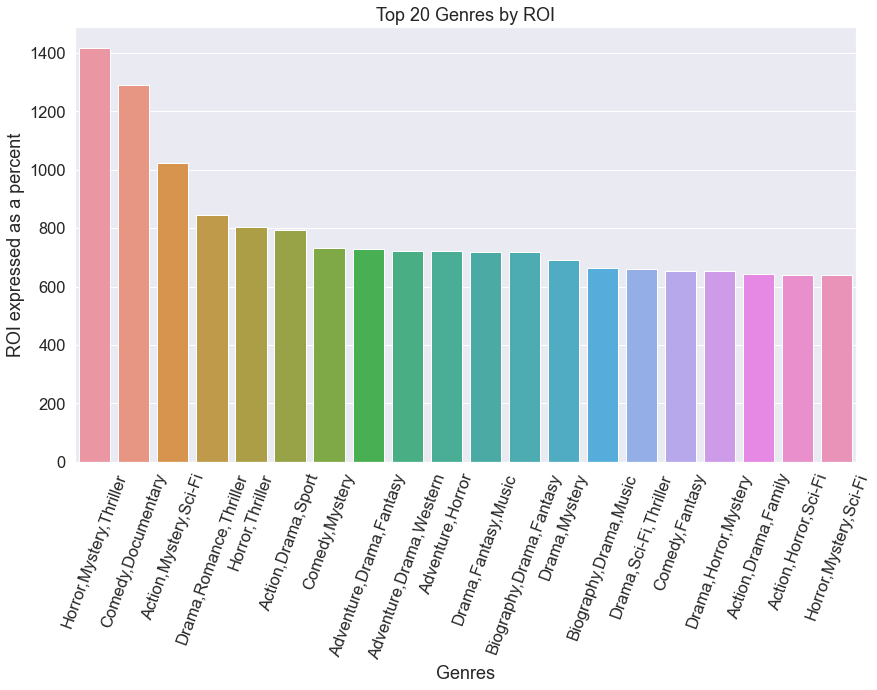

In [44]:
# one bar chart with genres on x axis, total gross on y axis
fig_dims = (14,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale=1.5)
sns.set_style("darkgrid")
palette = sns.set_palette("dark")
ax = sns.barplot(x=dfbudgets_2_sorted.head(20)['genres'], y=dfbudgets_2_sorted.head(20)['ROI'])
ax.set(xlabel="Genres",ylabel="ROI expressed as a percent")
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=70)
plt.title('Top 20 Genres by ROI')
plt.show()

### Question 4 Insights
#### There are some extremely high ROI's for certain combinations of genres. After establishing a solid foundation of quality content and a user base supportive of that content, we advise that Microsoft utilize less than the average for production budgets while diversifying content rapidly. A focus on finding material to develop in the Horror, Thriller, Mystery, and Sci-Fi will provide return in investment in the long run. The worst thing Microsoft could do is throw money at projects only to have them underperform without first establishing quality original content.